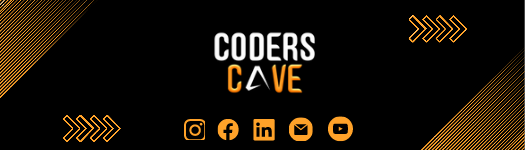

# Email Spam Detection 

## Name: Mohammad Wasiq

## CodersCave Data Science Internship Project

In [1]:
# load the require lib
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')

In [3]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

## Feature Selection

**Dropping irrelevant features from the dataset such as `"Unnamed:0"`**

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [8]:
df.columns

Index(['label', 'text', 'label_num'], dtype='object')

In [9]:
df.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

In [10]:
df['text']

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [11]:
df.shape

(5171, 3)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


# Data cleaning and Preprocessing

**Removing unnecessary text that does not add any meaning to the email.**

In [13]:
import re

In [14]:
# define a function to clean text data using regular expressions

def clean_text(text):
    text = re.sub(r"\S+@\S+", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
        # tokenize the text
    tokens = re.split(r"\s", text)
        # convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
        # remove stop words
    stop_words = set(['the', 'and', 'to', 'of', 'a', 'in', 'that', 'is', 'it', 'with', 'for'])
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # join filtered tokens back into text
    clean_text = ' '.join(filtered_tokens)
    
    
    return clean_text

# apply the function to the 'text' column in the DataFrame
df['clean_text'] = df['text'].apply(clean_text)


In [15]:
df.head()

,label,text,label_num,clean_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 this follo...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january 9 2001 see attached fi...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around mos...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal book teco ...


In [16]:
df['clean_text']

0       subject enron methanol meter 988291 this follo...
1       subject hpl nom january 9 2001 see attached fi...
2       subject neon retreat ho ho ho we re around mos...
3       subject photoshop windows office cheap main tr...
4       subject re indian springs this deal book teco ...
                              ...                        
5166    subject put 10 on ft transport volumes decreas...
5167    subject 3 4 2000 following noms hpl can t take...
5168    subject calpine daily gas nomination julie as ...
5169    subject industrial worksheets august 2000 acti...
5170    subject important online banking alert dear va...
Name: clean_text, Length: 5171, dtype: object

In [17]:
df['clean_text'] = df['clean_text'].str.replace('subject ', '')

In [18]:
df['clean_text']

0       enron methanol meter 988291 this follow up not...
1       hpl nom january 9 2001 see attached file hplno...
2       neon retreat ho ho ho we re around most wonder...
3       photoshop windows office cheap main trending a...
4       re indian springs this deal book teco pvr reve...
                              ...                        
5166    put 10 on ft transport volumes decreased from ...
5167    3 4 2000 following noms hpl can t take extra 1...
5168    calpine daily gas nomination julie as i mentio...
5169    industrial worksheets august 2000 activity att...
5170    important online banking alert dear valued cit...
Name: clean_text, Length: 5171, dtype: object

In [19]:
df

,label,text,label_num,clean_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter 988291 this follow up not...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom january 9 2001 see attached file hplno...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho we re around most wonder...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trending a...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,re indian springs this deal book teco pvr reve...
...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0,put 10 on ft transport volumes decreased from ...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,3 4 2000 following noms hpl can t take extra 1...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,calpine daily gas nomination julie as i mentio...
5169,ham,Subject: industrial worksheets for august 2000...,0,industrial worksheets august 2000 activity att...


**Since we have cleaned the text data that will be used to feed to the model, so we can drop raw data**

In [20]:
df.drop('text', axis=1, inplace=True)

In [21]:
df

,label,label_num,clean_text
0,ham,0,enron methanol meter 988291 this follow up not...
1,ham,0,hpl nom january 9 2001 see attached file hplno...
2,ham,0,neon retreat ho ho ho we re around most wonder...
3,spam,1,photoshop windows office cheap main trending a...
4,ham,0,re indian springs this deal book teco pvr reve...
...,...,...,...
5166,ham,0,put 10 on ft transport volumes decreased from ...
5167,ham,0,3 4 2000 following noms hpl can t take extra 1...
5168,ham,0,calpine daily gas nomination julie as i mentio...
5169,ham,0,industrial worksheets august 2000 activity att...


**Now that we have cleaned our text data so its time to split the train and test variable for this we will need to import train test split module from Scikitlearn library**

In [22]:
import sklearn
from sklearn.model_selection import train_test_split

In [23]:
X = df['clean_text']
y = df['label_num'] 

In [24]:
X

0       enron methanol meter 988291 this follow up not...
1       hpl nom january 9 2001 see attached file hplno...
2       neon retreat ho ho ho we re around most wonder...
3       photoshop windows office cheap main trending a...
4       re indian springs this deal book teco pvr reve...
                              ...                        
5166    put 10 on ft transport volumes decreased from ...
5167    3 4 2000 following noms hpl can t take extra 1...
5168    calpine daily gas nomination julie as i mentio...
5169    industrial worksheets august 2000 activity att...
5170    important online banking alert dear valued cit...
Name: clean_text, Length: 5171, dtype: object

In [25]:
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train

1023    re tenaska i see demand fee changes williams p...
4586    strong buy alert monthly newsletter topstocks ...
2955    performance feedback each you have been chosen...
2495    hr performance objectives binders good morning...
3353    fw fwd fw drawing by school age child pa fwd t...
                              ...                        
4426    re ena sales on hpl last i had was legal was r...
466     tenaska iv bob i understand from sandi you ll ...
3092    broom bristles up flew be differentiable onoma...
3772    calpine daily gas nomination weekend ricky arc...
860     re meter 1459 6 00 yep you re right except s o...
Name: clean_text, Length: 3619, dtype: object

In [28]:
X_test

1566    hpl nom march 30 2001 see attached file hplno ...
1988    online pharxmacy 80 off all meds disscount pha...
1235    re nom actual volume april 17 th we agree eile...
2868    re meter 8740 dec 99 robert i put our heads to...
4903    re coastal oil gas corporation melissa deal 34...
                              ...                        
5135    revision 1 enron hpl actuals august 3 2000 iss...
2298    re discrepancies price gas redelivered at mobi...
1519    well head here list meter i moved from lst on ...
1740    jordyn there nothing like dream create future ...
1700    union gas thamm 1 tom thamm 1 well came on lin...
Name: clean_text, Length: 1552, dtype: object

# Feature Extraction

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(max_df=0.7, stop_words='english')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [31]:
y_test, y_train

(1566    0
 1988    1
 1235    0
 2868    0
 4903    0
        ..
 5135    0
 2298    0
 1519    0
 1740    1
 1700    0
 Name: label_num, Length: 1552, dtype: int32,
 1023    0
 4586    1
 2955    0
 2495    0
 3353    0
        ..
 4426    0
 466     0
 3092    1
 3772    0
 860     0
 Name: label_num, Length: 3619, dtype: int32)

In [32]:
print(X_test_features)

  (0, 40502)	0.34416867567520637
  (0, 27174)	0.1646067888834387
  (0, 24928)	0.197087795068719
  (0, 20406)	0.49655991440974956
  (0, 20401)	0.13037863127281704
  (0, 17089)	0.168138035912095
  (0, 6274)	0.14199092872157937
  (0, 1509)	0.6750070496138264
  (0, 1379)	0.16217284181745661
  (0, 932)	0.14721488399652838
  (1, 41154)	0.005154297078281474
  (1, 40971)	0.08870355300858138
  (1, 39930)	0.06910443214882987
  (1, 39514)	0.08147098934494065
  (1, 39303)	0.09552690324001073
  (1, 38929)	0.004029150619894842
  (1, 38814)	0.08870355300858138
  (1, 38684)	0.09552690324001073
  (1, 38141)	0.09552690324001073
  (1, 37901)	0.08447277448127313
  (1, 37653)	0.07300943229032412
  (1, 37471)	0.05054499158560902
  (1, 37239)	0.0037503107316411567
  (1, 37204)	0.08870355300858138
  (1, 37192)	0.002804269307207404
  :	:
  (1551, 20439)	0.12623257519242975
  (1551, 18381)	0.223172375027066
  (1551, 18195)	0.16824692943813288
  (1551, 18169)	0.14040130272918946
  (1551, 17544)	0.187354960638256

In [33]:
print(X_train_features)

  (0, 25418)	0.15821151628187405
  (0, 18758)	0.1356706809736233
  (0, 26187)	0.148728485628434
  (0, 786)	0.21194839304669752
  (0, 7629)	0.1905651691875485
  (0, 1747)	0.23921350094621516
  (0, 12960)	0.09105072028163443
  (0, 1327)	0.21807841116538249
  (0, 306)	0.09971342523140354
  (0, 0)	0.19481402321970076
  (0, 218)	0.08579472474590763
  (0, 30237)	0.28596107994725917
  (0, 5617)	0.5503815950072573
  (0, 30323)	0.1546313271057508
  (0, 18991)	0.14066086061309693
  (0, 24312)	0.17563930136652162
  (0, 9952)	0.22809920915246173
  (0, 30233)	0.22115670197691903
  (0, 39909)	0.1811408523085531
  (0, 9956)	0.13528642519112732
  (0, 16886)	0.15395886438958267
  (0, 13285)	0.1617959503939296
  (0, 36635)	0.15395886438958267
  (1, 17946)	0.0194183589065498
  (1, 26544)	0.021623728175877176
  :	:
  (3618, 29807)	0.08546632258737796
  (3618, 25582)	0.2048907484204242
  (3618, 23816)	0.14452644018456617
  (3618, 12883)	0.05330618870547384
  (3618, 23461)	0.17711714791321959
  (3618, 4791)

**Now that everything is done, we will finally train our machine learning logistic regression model on the above data**

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()

**Training the Logistic Regression model with the training data.**

In [36]:
model.fit(X_train_features, y_train)

LogisticRegression()

**Our model if fitted and now its time to check the accuracy of  model, but before we will Evaluate this model.**

**Prediction made by our model on given training data**

In [37]:
prediction_on_training_data = model.predict(X_train_features)

In [38]:
prediction_on_training_data

array([0, 1, 0, ..., 1, 0, 0])

In [39]:
prediction_on_test_data = model.predict(X_test_features)

In [40]:
prediction_on_test_data

array([0, 1, 0, ..., 0, 1, 0])

In [41]:
from sklearn.metrics import accuracy_score

##### Accuracy of prediction on training data

In [42]:
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [43]:
accuracy_on_training_data

0.9961315280464217

In [44]:
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [45]:
accuracy_on_test_data

0.9903350515463918

**The accuracy of our model is 0.99**

**We can easily that our model is** $99\%$ **accurate, this accuracy is really very good for any model.**

We want to notify you that the NSE & MCX will be conducting a Mock Trading Day tomorrow, 1st April, 2023. The event will feature simulated data and a mock trading session from 9:00 AM to 6:00 PM. Please note that your trading will be temporarily moved from the primary to the DR site during this activity. This may result in some technical difficulties, and we apologise for any inconvenience this may cause. Below is the schedule for the Mock Trading Day for Primary and DR site participation

In [47]:
input_mail = [input('Enter : ')]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
    print('\n Ham mail')

else:
    print(' \n Spam mail')

Enter : We want to notify you that the NSE & MCX will be conducting a Mock Trading Day tomorrow, 1st April, 2023. The event will feature simulated data and a mock trading session from 9:00 AM to 6:00 PM. Please note that your trading will be temporarily moved from the primary to the DR site during this activity. This may result in some technical difficulties, and we apologise for any inconvenience this may cause. Below is the schedule for the Mock Trading Day for Primary and DR site participation
[0]
 
 Spam mail
